In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split, KFold
from sklearn.metrics import r2_score, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load Data

df = pd.read_csv("data_processed.csv")

df.head(10)

,ID,Player,Win,Game,PA,AB,Run,H,2B,3B,...,3B_per_PA,HR_per_PA,BB_per_PA,SB_per_PA,HBP_per_PA,SF_per_PA,WPA_total,High_Leverage_PA_total,WPA_per_High_Leverage_PA,Hits_Rolling_Std
0,aaronha01,Henry Aaron(1954~1976),1692,3234,13666,12121,2128,3703,614,96,...,0.007025,0.054149,0.100395,0.017562,0.002342,0.008781,15.799,2219,0.007120,0.911988
1,aaronto01,Tommie Aaron(1962~1971),161,373,1045,944,99,216,42,6,...,0.005742,0.012440,0.081340,0.008612,0.000000,0.005742,-4.792,211,-0.022711,0.739198
2,abbotje01,Jeff Abbott(1997~2001),98,212,651,596,82,157,33,2,...,0.003072,0.027650,0.058372,0.009217,0.004608,0.010753,0.294,84,0.003500,0.855905
3,abbotku01,Kurt Abbott(1993~2001),308,665,2227,2044,268,523,109,23,...,0.010328,0.027840,0.059722,0.008981,0.007634,0.005388,-0.154,341,-0.000452,0.797247
4,abercre01,Reggie Abercrombie(2006~2008),63,140,421,386,56,86,20,2,...,0.004751,0.021378,0.049881,0.033254,0.016627,0.004751,-1.036,34,-0.030471,0.750012
5,abernbr01,Brent Abernathy(2001~2005),91,230,955,868,97,212,36,5,...,0.005236,0.008377,0.062827,0.021990,0.007330,0.004188,-3.129,176,-0.017778,0.908542
6,aberscl01,Cliff Aberson(1947~1949),24,63,205,179,25,45,7,3,...,0.014634,0.024390,0.126829,0.000000,0.000000,0.000000,0.255,20,0.012750,0.791516
7,abnersh01,Shawn Abner(1987~1992),157,323,902,840,81,191,39,4,...,0.004435,0.012195,0.047672,0.006652,0.007761,0.007761,-1.557,154,-0.010110,0.659326
8,abramca01,Cal Abrams(1949~1956),194,546,1943,1612,255,433,64,19,...,0.009779,0.016469,0.156974,0.006176,0.003603,0.001544,-0.594,248,-0.002395,0.825599
9,abreubo01,Bobby Abreu(1996~2014),1226,2412,10081,8480,1453,2470,574,59,...,0.005853,0.028569,0.146414,0.039579,0.003273,0.008432,7.156,1598,0.004478,0.884320


In [3]:
print(df.columns)

Index(['ID', 'Player', 'Win', 'Game', 'PA', 'AB', 'Run', 'H', '2B', '3B', 'HR',
       'BB', 'SF', 'HBP', 'SB', 'Date_min', 'Date_max', '1B', 'XBH', 'AVG',
       'SLG', 'OBP', 'OPS', 'Hard_Hit_Efficiency', 'Speed_Score',
       'Runs_per_PA', '1B_per_PA', '2B_per_PA', '3B_per_PA', 'HR_per_PA',
       'BB_per_PA', 'SB_per_PA', 'HBP_per_PA', 'SF_per_PA', 'WPA_total',
       'High_Leverage_PA_total', 'WPA_per_High_Leverage_PA',
       'Hits_Rolling_Std'],
      dtype='object')


In [4]:
# Classify Columns

id = ["ID", "Player"]
y = ["Runs_per_PA"]
exclude = ["Run", "Win", "Game", "Date_min", "Date_max", "PA", "AB", "H", "2B", "3B", "HR", "BB", "SF", "SB"]

In [5]:
# Choose attributes

y_data = df.loc[:, y]
x_data = df.drop(columns=id + y + exclude)

x_data.head(10)

,HBP,1B,XBH,AVG,SLG,OBP,OPS,Hard_Hit_Efficiency,Speed_Score,1B_per_PA,...,3B_per_PA,HR_per_PA,BB_per_PA,SB_per_PA,HBP_per_PA,SF_per_PA,WPA_total,High_Leverage_PA_total,WPA_per_High_Leverage_PA,Hits_Rolling_Std
0,32,2253,1450,0.305503,0.555152,0.374276,0.929429,0.119627,0.069516,0.164862,...,0.007025,0.054149,0.100395,0.017562,0.002342,0.008781,15.799,2219,0.007120,0.911988
1,0,155,61,0.228814,0.327331,0.290821,0.618152,0.064619,0.054545,0.148325,...,0.005742,0.012440,0.081340,0.008612,0.000000,0.005742,-4.792,211,-0.022711,0.739198
2,3,104,53,0.263423,0.416107,0.307453,0.723561,0.088926,0.062980,0.159754,...,0.003072,0.027650,0.058372,0.009217,0.004608,0.010753,0.294,84,0.003500,0.855905
3,17,329,194,0.255871,0.422701,0.305077,0.727778,0.094912,0.068253,0.147732,...,0.010328,0.027840,0.059722,0.008981,0.007634,0.005388,-0.154,341,-0.000452,0.797247
4,7,55,31,0.222798,0.354922,0.274038,0.628961,0.080311,0.085511,0.130641,...,0.004751,0.021378,0.049881,0.033254,0.016627,0.004751,-1.036,34,-0.030471,0.750012
5,7,163,49,0.244240,0.324885,0.297125,0.622009,0.056452,0.064921,0.170681,...,0.005236,0.008377,0.062827,0.021990,0.007330,0.004188,-3.129,176,-0.017778,0.908542
6,0,30,15,0.251397,0.407821,0.346341,0.754163,0.083799,0.048780,0.146341,...,0.014634,0.024390,0.126829,0.000000,0.000000,0.000000,0.255,20,0.012750,0.791516
7,7,137,54,0.227381,0.322619,0.268673,0.591292,0.064286,0.054324,0.151885,...,0.004435,0.012195,0.047672,0.006652,0.007761,0.007761,-1.557,154,-0.010110,0.659326
8,7,318,115,0.268610,0.391439,0.386611,0.778051,0.071340,0.048893,0.163664,...,0.009779,0.016469,0.156974,0.006176,0.003603,0.001544,-0.594,248,-0.002395,0.825599
9,33,1549,921,0.291274,0.474764,0.394977,0.869741,0.108608,0.102371,0.153655,...,0.005853,0.028569,0.146414,0.039579,0.003273,0.008432,7.156,1598,0.004478,0.884320


In [6]:
# Correlation Matrix

cor_matrix = x_data.corr()
n_attributes = len(x_data.columns)

cor_matrix.head(n_attributes)

,HBP,1B,XBH,AVG,SLG,OBP,OPS,Hard_Hit_Efficiency,Speed_Score,1B_per_PA,...,3B_per_PA,HR_per_PA,BB_per_PA,SB_per_PA,HBP_per_PA,SF_per_PA,WPA_total,High_Leverage_PA_total,WPA_per_High_Leverage_PA,Hits_Rolling_Std
HBP,1.000000,0.656403,0.715841,0.355543,0.464409,0.406571,0.482499,0.401423,0.239824,0.034507,...,-0.035677,0.338873,0.152344,0.119150,0.398664,0.188571,-0.048185,0.683893,0.186760,0.398477
1B,0.656403,1.000000,0.915224,0.569749,0.488447,0.519963,0.543135,0.332897,0.336194,0.311449,...,0.129832,0.198921,0.156376,0.196551,-0.048976,0.123630,-0.056508,0.960593,0.257753,0.589238
XBH,0.715841,0.915224,1.000000,0.519011,0.640995,0.530348,0.654062,0.537674,0.308835,0.103787,...,0.062775,0.435949,0.237450,0.113318,0.013212,0.186400,0.047731,0.948849,0.267722,0.539804
AVG,0.355543,0.569749,0.519011,1.000000,0.680281,0.801099,0.786153,0.404372,0.462004,0.708805,...,0.315998,0.095526,0.044426,0.149264,-0.028042,-0.068070,0.090187,0.509900,0.335759,0.737423
SLG,0.464409,0.488447,0.640995,0.680281,1.000000,0.664393,0.957445,0.911738,0.377611,0.005192,...,0.141726,0.764832,0.221869,-0.013247,0.144630,0.171773,0.142283,0.538899,0.333588,0.539893
OBP,0.406571,0.519963,0.530348,0.801099,0.664393,1.000000,0.851826,0.459896,0.348897,0.369573,...,0.222758,0.210912,0.617473,0.111793,0.089106,-0.059147,0.206469,0.503892,0.383603,0.551574
OPS,0.482499,0.543135,0.654062,0.786153,0.957445,0.851826,1.000000,0.816614,0.399392,0.146356,...,0.185355,0.617501,0.393951,0.033886,0.135778,0.097551,0.179455,0.572289,0.381940,0.591399
Hard_Hit_Efficiency,0.401423,0.332897,0.537674,0.404372,0.911738,0.459896,0.816614,1.000000,0.392064,-0.337236,...,0.070882,0.804292,0.230908,-0.081182,0.197754,0.222363,0.118375,0.410375,0.244927,0.345382
Speed_Score,0.239824,0.336194,0.308835,0.462004,0.377611,0.348897,0.399392,0.392064,1.000000,0.184964,...,0.427552,-0.013625,-0.032015,0.773115,0.054410,-0.039493,0.050705,0.284421,0.183588,0.429178
1B_per_PA,0.034507,0.311449,0.103787,0.708805,0.005192,0.369573,0.146356,-0.337236,0.184964,1.000000,...,0.267688,-0.499777,-0.286236,0.204190,-0.196688,-0.236846,-0.033081,0.189228,0.130917,0.499965


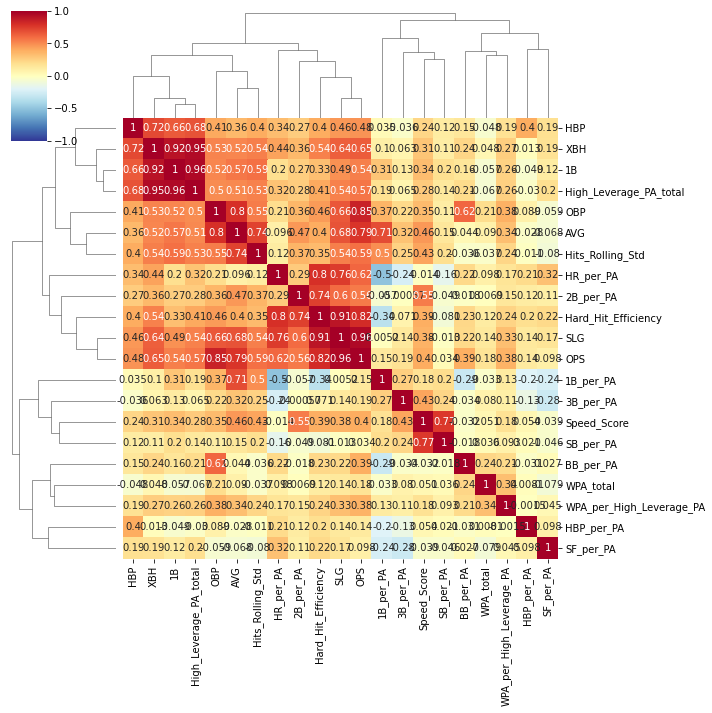

In [7]:
# Correaltion Plot

sns.clustermap(cor_matrix, annot = True, cmap = 'RdYlBu_r', vmin = -1, vmax = 1)


In [8]:
# Scaler

scaler = StandardScaler()
scaler.fit(x_data)
scaled_x_data = pd.DataFrame(scaler.transform(x_data), columns=x_data.columns)

scaled_x_data.head(10)

,HBP,1B,XBH,AVG,SLG,OBP,OPS,Hard_Hit_Efficiency,Speed_Score,1B_per_PA,...,3B_per_PA,HR_per_PA,BB_per_PA,SB_per_PA,HBP_per_PA,SF_per_PA,WPA_total,High_Leverage_PA_total,WPA_per_High_Leverage_PA,Hits_Rolling_Std
0,0.760574,4.436548,6.278287,1.787108,2.798714,1.621085,2.587567,2.149112,0.603485,0.194205,...,0.139064,2.600777,0.670421,0.361770,-0.691372,0.895761,6.370363,4.546692,1.170251,1.231688
1,-0.665912,-0.514731,-0.496211,-0.649825,-0.624075,-0.654555,-0.690168,-0.304038,-0.184549,-0.395294,...,-0.131376,-0.427270,0.001731,-0.273281,-1.054536,0.191382,-1.326995,-0.388030,-1.332711,-0.454981
2,-0.532179,-0.635091,-0.535229,0.449943,0.709707,-0.201032,0.419786,0.779978,0.259450,0.012130,...,-0.694012,0.676941,-0.804257,-0.230410,-0.339819,1.352735,0.574261,-0.700137,0.866524,0.684248
3,0.091909,-0.104091,0.152463,0.209966,0.808763,-0.265830,0.464189,1.046918,0.537035,-0.416433,...,0.835250,0.690762,-0.756888,-0.247149,0.129384,0.109523,0.406789,-0.068551,0.534963,0.111660
4,-0.353868,-0.750731,-0.642528,-0.840982,-0.209537,-1.112186,-0.576350,0.395771,1.445473,-1.025707,...,-0.340256,0.221589,-1.102205,1.475300,1.524216,-0.038298,0.077079,-0.823013,-1.983790,-0.349418
5,-0.353868,-0.495851,-0.554738,-0.159635,-0.660819,-0.482676,-0.649548,-0.668254,0.361648,0.401643,...,-0.238031,-0.722259,-0.647906,0.675960,0.082275,-0.168571,-0.705330,-0.474044,-0.918848,1.198049
6,-0.665912,-0.809731,-0.720564,0.067791,0.585216,0.859362,0.742023,0.551322,-0.488019,-0.466017,...,1.742900,0.440300,1.598044,-0.884421,-1.054536,-1.139285,0.559682,-0.857419,1.642649,0.055720
7,-0.353868,-0.557211,-0.530351,-0.695349,-0.694860,-1.258481,-0.972997,-0.318885,-0.196221,-0.268408,...,-0.406860,-0.445062,-1.179737,-0.412402,0.149072,0.659279,-0.117682,-0.528110,-0.275460,-1.234632
8,-0.353868,-0.130051,-0.232839,0.614788,0.339093,1.957434,0.993561,-0.004295,-0.482072,0.151524,...,0.719516,-0.134752,2.655869,-0.446170,-0.495784,-0.781450,0.242308,-0.297102,0.371889,0.388418
9,0.805152,2.775108,3.698223,1.334949,1.590965,2.185553,1.959063,1.657728,2.332996,-0.205285,...,-0.107988,0.743648,2.285310,1.924140,-0.546840,0.814828,3.139424,3.020565,0.948592,0.961614


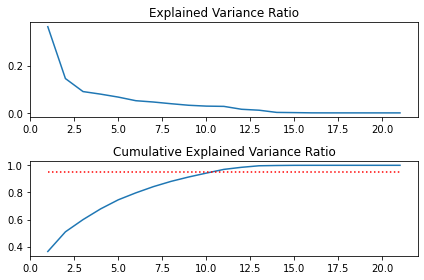

In [9]:
# PCA

threshold_PCA = 0.95

pca0 = PCA()
pca0.fit(scaled_x_data)
explained_variance_ratio_0 = pca0.explained_variance_ratio_

cumulative_explained_variance_ratio_0 = []
cur = 0
for i in range(n_attributes):
    cur += explained_variance_ratio_0[i]
    cumulative_explained_variance_ratio_0.append(cur)

plt.subplot(2, 1, 1)
plt.plot(range(1, n_attributes + 1), explained_variance_ratio_0)
plt.title("Explained Variance Ratio")
plt.subplot(2, 1, 2)
plt.plot(range(1, n_attributes + 1), cumulative_explained_variance_ratio_0)
plt.plot(range(1, n_attributes + 1), [threshold_PCA] * n_attributes, "r:")
plt.title("Cumulative Explained Variance Ratio")

plt.tight_layout()
plt.show()

In [10]:
# PCA limited

n_comp = 0
cur = 0
for i in range(n_attributes):
    cur += explained_variance_ratio_0[i]
    n_comp += 1
    if cur > threshold_PCA:
        break

pca1 = PCA(n_components=n_comp)
pca1.fit(scaled_x_data)
explained_variance_ratio_1 = pca1.explained_variance_ratio_

print(explained_variance_ratio_1)

x_pca = pd.DataFrame(pca1.transform(scaled_x_data), columns=["PC" + str(i) for i in range(n_comp)])

x_pca.head(10)

[0.36420886 0.14506732 0.09009923 0.07924042 0.06677356 0.0514979
 0.04593096 0.03876508 0.03223394 0.02862841 0.02751823]


,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,9.563040,1.136809,0.892622,3.151037,2.293875,-1.948477,2.882914,-3.347207,-1.369375,-3.036616,-3.039816
1,-2.016592,0.120919,0.572061,-0.563285,-0.610376,-1.249327,-1.004239,0.730305,-0.064986,0.147074,-0.102564
2,0.615058,0.899037,-1.155343,-0.814624,-1.054595,-0.389818,1.971335,0.727879,0.086146,-0.125669,0.087086
3,1.192878,0.641007,-0.978276,-1.051408,-0.418551,-0.355914,0.543950,-0.959383,0.265456,0.368190,-0.148473
4,-1.407866,0.676681,-0.467508,-3.428150,0.816324,0.565074,-0.549138,0.015757,-0.519034,-1.176610,-0.560733
5,-1.299803,-1.328617,0.426197,-1.132758,-0.352514,0.264774,-0.259268,0.533786,-0.125960,-0.551428,0.267586
6,0.284467,0.190858,-2.880633,2.014416,-0.070717,-0.764345,-0.672368,-0.743178,0.907242,0.977248,0.847527
7,-2.314386,0.592934,0.441024,-1.038035,-0.320026,-0.089751,0.876871,-0.092060,-0.270436,0.504164,-0.568484
8,1.089180,-0.345140,-1.719669,2.617794,0.237098,0.060805,-1.638636,0.901637,0.451960,0.241398,0.205628
9,7.391472,-0.017434,-0.189683,1.046749,3.212886,-1.515380,0.733696,0.188858,-1.740665,-0.955453,-1.638713


In [11]:
# Split data

x_train, x_test, y_train, y_test = train_test_split(x_pca, y_data, test_size=0.3, shuffle=True, random_state=195)


In [12]:
# KFold

n_s = 10
kf = KFold(n_splits=n_s, shuffle=True, random_state=195)


In [13]:
# Simple linear regresssion

model_lm = LinearRegression()
model_lm_best = LinearRegression()
r2_best = 0

for i, (train_idx, validation_idx) in enumerate(kf.split(x_train)):
    x_t, x_v = x_train.iloc[train_idx], x_train.iloc[validation_idx]
    y_t, y_v = y_train.iloc[train_idx], y_train.iloc[validation_idx]
    model_lm.fit(x_t, y_t)
    
    r2_validation = r2_score(y_v, model_lm.predict(x_v))
    print(f"R_squared of validation {i}: {r2_validation:.4f}")
    
    if r2_validation > r2_best:
        r2_best = r2_validation
        model_lm_best.fit(x_t, y_t)

r2_test = r2_score(y_test, model_lm_best.predict(x_test))
print("======================================")
print(f"R_squared of test data: {r2_test:.4f}")


R_squared of validation 0: 0.6382
R_squared of validation 1: 0.6018
R_squared of validation 2: 0.6632
R_squared of validation 3: 0.6346
R_squared of validation 4: 0.5973
R_squared of validation 5: 0.6298
R_squared of validation 6: 0.6973
R_squared of validation 7: 0.6891
R_squared of validation 8: 0.5842
R_squared of validation 9: 0.6875
R_squared of test data: 0.6259


In [14]:
# Random forest

model_rf = RandomForestRegressor(n_estimators=200)
model_rf_best = RandomForestRegressor(n_estimators=200)
r2_best = 0

for i, (train_idx, validation_idx) in enumerate(kf.split(x_train)):
    x_t, x_v = x_train.iloc[train_idx], x_train.iloc[validation_idx]
    y_t, y_v = y_train.iloc[train_idx], y_train.iloc[validation_idx]
    model_rf.fit(x_t, np.ravel(y_t))
    
    r2_validation = r2_score(y_v, model_rf.predict(x_v))
    print(f"R_squared of validation {i}: {r2_validation:.4f}")
    
    if r2_validation > r2_best:
        r2_best = r2_validation
        model_rf_best.fit(x_t, np.ravel(y_t))

r2_test = r2_score(y_test, model_rf_best.predict(x_test))
print("======================================")
print(f"R_squared of test data: {r2_test:.4f}")


R_squared of validation 0: 0.6320
R_squared of validation 1: 0.5858
R_squared of validation 2: 0.6339
R_squared of validation 3: 0.6193
R_squared of validation 4: 0.5574
R_squared of validation 5: 0.6368
R_squared of validation 6: 0.6555
R_squared of validation 7: 0.6713
R_squared of validation 8: 0.5731
R_squared of validation 9: 0.6566
R_squared of test data: 0.6025


In [15]:
# Expected Runs per PA

expected_lm = model_lm_best.predict(x_pca)
expected_rf = model_rf_best.predict(x_pca)
df["Expected_Runs_per_PA_lm"] = expected_lm
df["Expected_Runs_per_PA_rf"] = expected_rf

df.loc[:, ["Player", "Runs_per_PA", "Expected_Runs_per_PA_lm", "Expected_Runs_per_PA_rf"]].head(30)

,Player,Runs_per_PA,Expected_Runs_per_PA_lm,Expected_Runs_per_PA_rf
0,Henry Aaron(1954~1976),0.155715,0.159829,0.154488
1,Tommie Aaron(1962~1971),0.094737,0.092273,0.093122
2,Jeff Abbott(1997~2001),0.125960,0.108450,0.119904
3,Kurt Abbott(1993~2001),0.120341,0.114785,0.116543
4,Reggie Abercrombie(2006~2008),0.133017,0.110564,0.124695
5,Brent Abernathy(2001~2005),0.101571,0.102171,0.101949
6,Cliff Aberson(1947~1949),0.121951,0.117899,0.117003
7,Shawn Abner(1987~1992),0.089800,0.085388,0.081988
8,Cal Abrams(1949~1956),0.131240,0.121616,0.127721
9,Bobby Abreu(1996~2014),0.144133,0.155859,0.146931


In [16]:
df.to_csv(path_or_buf="Result.csv", index=False)

In [17]:
print(f"R_squared_Linear: {r2_score(y_data, expected_lm)}")
print(f"R_squared_RF: {r2_score(y_data, expected_rf)}")

R_squared_Linear: 0.6405924302693827
R_squared_RF: 0.8245503205391798
